In [8]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

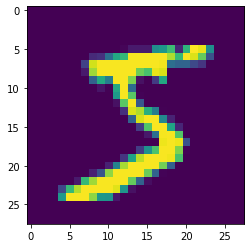

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [11]:
#For scaling as max value can be 255 so dividing all values by 255 to bring it to 0-1 range
X_train = X_train/255
X_test = X_test/255

In [13]:
model = Sequential()
#input layer flattening from 28*28 to 784 is done by Flatten
model.add(Flatten(input_shape = (28,28)))
#hidden layer - here we do not have to define the input_dim as flattens output will be provided to this layer
model.add(Dense(128, activation = 'relu'))
#output layer - since multiclass classification therefore softmax
model.add(Dense(10, activation = 'softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# loss can be categorical_crossentropy or sparse_categorical_crossentropy(no one hot encoding of **labels required)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "Adam")
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.0160 - val_loss: 0.0985
Epoch 2/10
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0124 - val_loss: 0.0990
Epoch 3/10
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0098 - val_loss: 0.1048
Epoch 4/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.0087 - val_loss: 0.1073
Epoch 5/10
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0073 - val_loss: 0.1118
Epoch 6/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.0078 - val_loss: 0.1204
Epoch 7/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.0056 - val_loss: 0.1151
Epoch 8/10
48000/48000 [==============================] - 2s 37us/sample - loss: 0.0052 - val_loss: 0.1198
Epoch 9/10
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0054 - val_

In [19]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9793

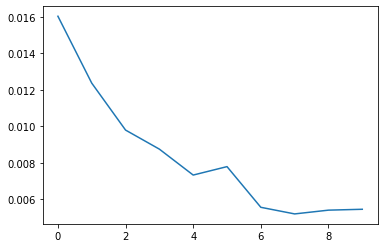

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])

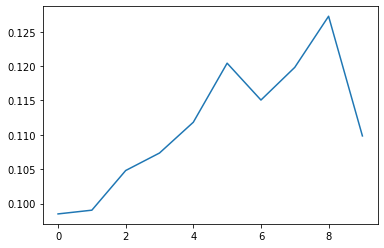

In [25]:
plt.plot(history.history['val_loss'])

In [26]:
# this will work only when we put metrics = ['accuracy'] to model.compile part
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])

In [27]:
#for prediction
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

array([7])

In [31]:
X_test[0].shape, X_test.shape
# hence we had to do reshape(1,28,28) when we were predicting for a row

((28, 28), (10000, 28, 28))

In [33]:
#however, if we have two rows, we dont have to do that
print(X_test[0:2].shape)
model.predict(X_test[0:2]).argmax(axis=1)

(2, 28, 28)


array([7, 2])

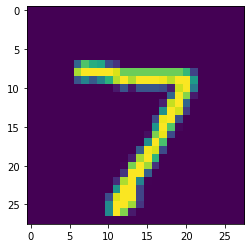

In [36]:
plt.imshow(X_test[0])

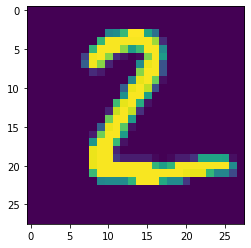

In [39]:
plt.imshow(X_test[1])